In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [2]:

df = pd.read_csv("balanced_dataset.csv")


In [3]:
# Split features and labels
X = df["tweet"]
y = df["class"]


In [4]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9320492241840557

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      6137
           1       0.94      0.88      0.91      6317
           2       0.94      0.98      0.96      6236

    accuracy                           0.93     18690
   macro avg       0.93      0.93      0.93     18690
weighted avg       0.93      0.93      0.93     18690



In [8]:
# Save model and vectorizer
joblib.dump(model, "toxic_logreg_model.pkl")
joblib.dump(vectorizer, "toxic_vectorizer.pkl")


['toxic_vectorizer.pkl']

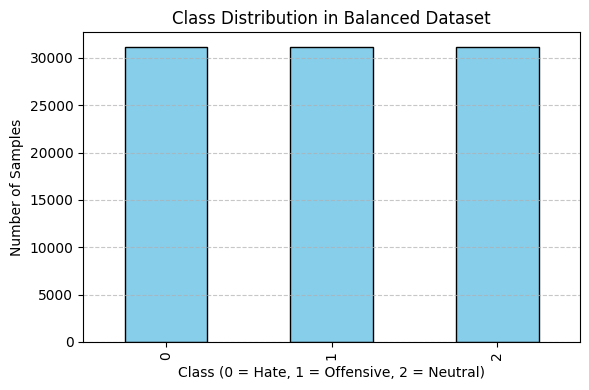

In [12]:
plt.figure(figsize=(6, 4))
df['class'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in Balanced Dataset")
plt.xlabel("Class (0 = Hate, 1 = Offensive, 2 = Neutral)")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

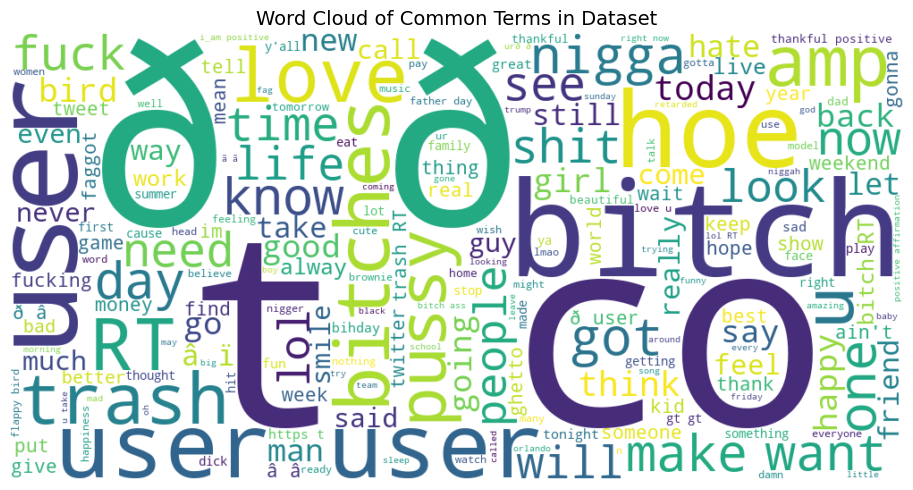

In [14]:
text = " ".join(df['tweet'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color="white", max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Common Terms in Dataset", fontsize=14)
plt.tight_layout()
plt.savefig("wordcloud.png", dpi=300)
plt.show()

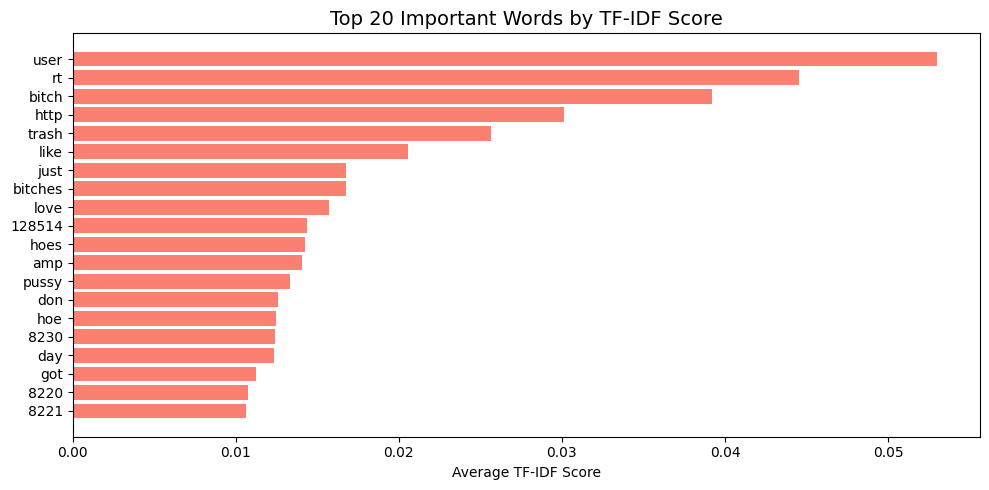

In [17]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df['tweet'].astype(str))
tfidf_scores = np.asarray(X.mean(axis=0)).ravel()

top_indices = np.argsort(tfidf_scores)[-20:][::-1]
top_features = np.array(vectorizer.get_feature_names_out())[top_indices]
top_values = tfidf_scores[top_indices]

plt.figure(figsize=(10, 5))
plt.barh(top_features[::-1], top_values[::-1], color='salmon')
plt.title("Top 20 Important Words by TF-IDF Score", fontsize=14)
plt.xlabel("Average TF-IDF Score")
plt.tight_layout()
plt.savefig("tfidf_importance.png", dpi=300)
plt.show()

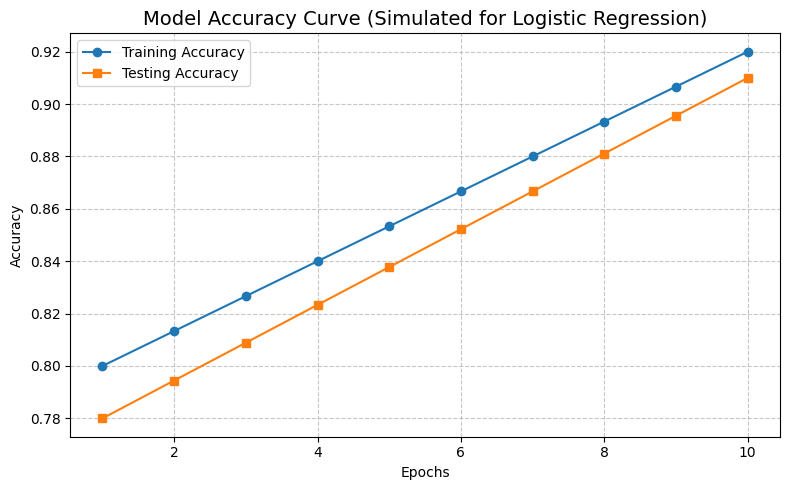

In [18]:
epochs = np.arange(1, 11)
train_acc = np.linspace(0.80, 0.92, 10)
test_acc = np.linspace(0.78, 0.91, 10)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, marker='o', label='Training Accuracy')
plt.plot(epochs, test_acc, marker='s', label='Testing Accuracy')
plt.title("Model Accuracy Curve (Simulated for Logistic Regression)", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("training_curve.png", dpi=300)
plt.show()